In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline

In [2]:
fair_probs = tf.ones(6) / 6
tfp.distributions.Multinomial(1, fair_probs).sample()

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0.], dtype=float32)>

In [3]:
tfp.distributions.Multinomial(10, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 2., 2., 3., 2., 1.], dtype=float32)>

In [4]:
counts = tfp.distributions.Multinomial(1000, fair_probs).sample()
counts / 1000

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.176, 0.16 , 0.178, 0.164, 0.161, 0.161], dtype=float32)>

In [5]:
def use_svg_display():
    display.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

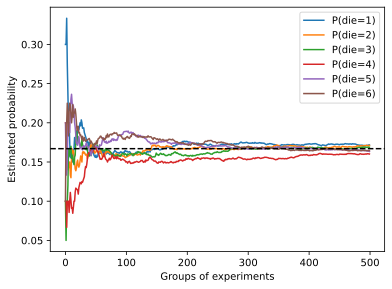

In [6]:
counts = tfp.distributions.Multinomial(10, fair_probs).sample(500)
cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)

set_figsize((6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(), 
            label=('P(die=' + str(i + 1) + ')'))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()